In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
df=pd.read_csv('/content/Airbnb_Open_Data.csv',low_memory=False)

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18401 entries, 0 to 18400
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18401 non-null  int64  
 1   NAME                            18325 non-null  object 
 2   host id                         18401 non-null  int64  
 3   host_identity_verified          18305 non-null  object 
 4   host name                       18361 non-null  object 
 5   neighbourhood group             18373 non-null  object 
 6   neighbourhood                   18384 non-null  object 
 7   lat                             18392 non-null  float64
 8   long                            18392 non-null  float64
 9   country                         18350 non-null  object 
 10  country code                    18321 non-null  object 
 11  instant_bookable                18321 non-null  object 
 12  cancellation_policy             

In [9]:
df.duplicated().value_counts()

,count
False,18401


In [10]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
#clean the data

In [17]:
print(df.columns.tolist())


['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [19]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop unused columns
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Clean and convert price columns
df['price_$'] = df['price_$'].astype(str).str.replace('$', '', regex=False)
df['price_$'] = df['price_$'].str.replace(',', '', regex=False).str.strip()
df['price_$'] = df['price_$'].astype(float)

df['service_fee_$'] = df['service_fee_$'].astype(str).str.replace('$', '', regex=False)
df['service_fee_$'] = df['service_fee_$'].str.replace(',', '', regex=False).str.strip()
df['service_fee_$'] = df['service_fee_$'].astype(float)

# Convert other types
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Fix neighbourhood typo
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Remove rows with unrealistic availability
df = df[df['availability 365'] <= 500]



/tmp/ipython-input-2094982016.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'])


In [22]:
df.duplicated().value_counts()



,count
False,14484


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14484 entries, 0 to 18399
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14484 non-null  object        
 1   NAME                            14484 non-null  object        
 2   host id                         14484 non-null  object        
 3   host_identity_verified          14484 non-null  object        
 4   host name                       14484 non-null  object        
 5   neighbourhood group             14484 non-null  object        
 6   neighbourhood                   14484 non-null  object        
 7   lat                             14484 non-null  float64       
 8   long                            14484 non-null  float64       
 9   country                         14484 non-null  object        
 10  country code                    14484 non-null  object        
 11  instant

In [ ]:
#EDA

In [24]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484,14484.000000,14484.000000,14484.000000,14484.000000
mean,40.729535,-73.956987,2012.512082,619.732947,123.949461,7.362607,42.915217,2018-03-07 17:56:31.217895680,0.881316,2.994546,3.449116,199.200497
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688817,-73.983190,2008.000000,327.000000,65.000000,2.000000,4.000000,2016-10-08 00:00:00,0.090000,2.000000,1.000000,85.000000
50%,40.723105,-73.957990,2012.000000,615.000000,123.000000,3.000000,14.000000,2018-12-12 00:00:00,0.320000,3.000000,1.000000,199.000000
75%,40.764383,-73.941610,2018.000000,910.000000,182.000000,5.000000,57.000000,2019-06-16 00:00:00,1.200000,4.000000,2.000000,312.000000
max,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,14.580000,5.000000,121.000000,426.000000
std,0.053073,0.037852,5.760382,334.476706,66.898297,23.970588,62.859406,NaN,1.231487,1.419247,11.397543,129.110675


In [25]:
property_type=df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,8304
Private room,5981
Shared room,199


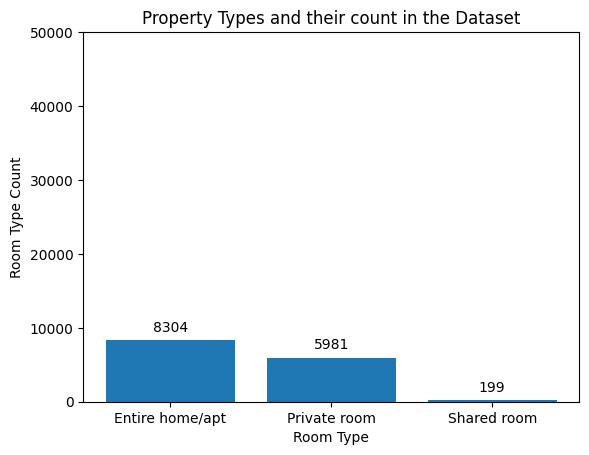

In [30]:
room_type_bar = plt.bar(property_type.index,property_type.loc[:, "count"]);

plt.bar_label(room_type_bar, labels=property_type.loc[:, "count"], padding = 4);

plt.ylim([0,50000]);

plt.xlabel('Room Type');

plt.ylabel('Room Type Count');

plt.title('Property Types and their count in the Dataset');

In [31]:
hood_group= df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,6664
Brooklyn,6313
Queens,1236
Bronx,209
Staten Island,62


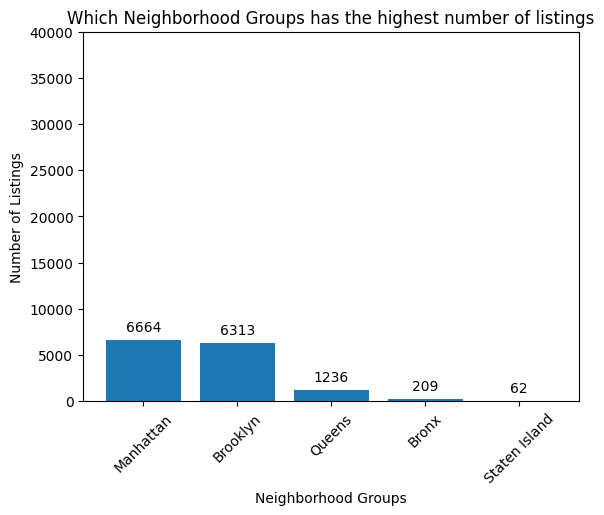

In [35]:
#which neighborhood group has the highest number of listings?

hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);

plt.bar_label(hood_group_bar,labels=hood_group.loc[:, "count"], padding=4);

plt.ylim([0,40000]);

plt.xlabel('Neighborhood Groups');

plt.ylabel('Number of Listings');

plt.xticks(rotation = 45);

plt.title('Which Neighborhood Groups has the highest number of listings');

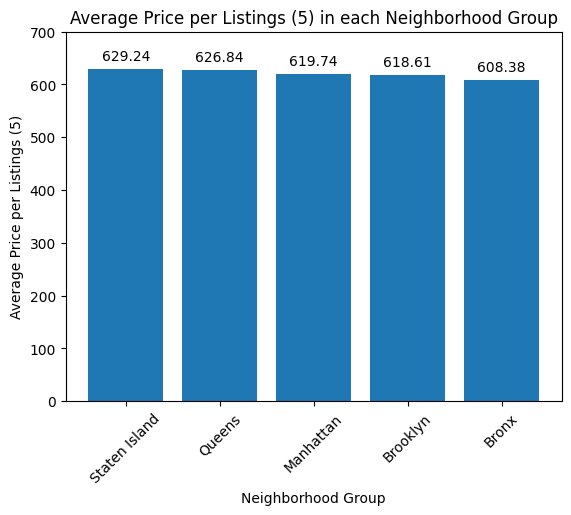

In [44]:
#whích neighborhoods group have the highest average prices for Airbnb listings?


avg_price=df.groupby('neighbourhood group') ['price_$'].mean().sort_values(ascending=False).to_frame()


avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:, 'price_$']);

plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"], 2), label_type='edge', padding = 4);

plt.ylim([0,700]);

plt.xlabel('Neighborhood Group');

plt.ylabel("Average Price per Listings (5)");

plt.xticks(rotation=45);

plt.title('Average Price per Listings (5) in each Neighborhood Group');

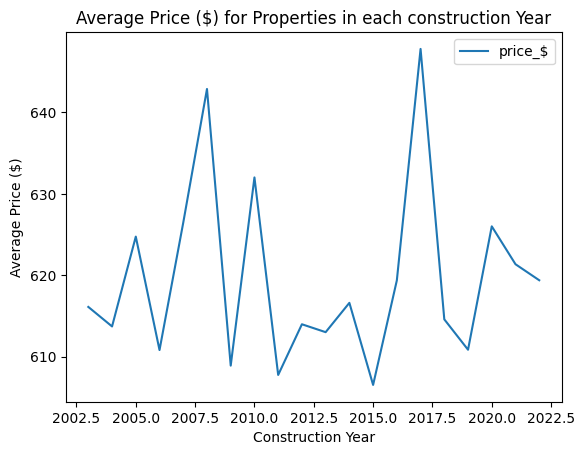

In [45]:
#Is there a relationship between the construction year of property and price?

df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();

plt.xlabel('Construction Year');

plt.ylabel('Average Price ($)');

plt.title('Average Price ($) for Properties in each construction Year');

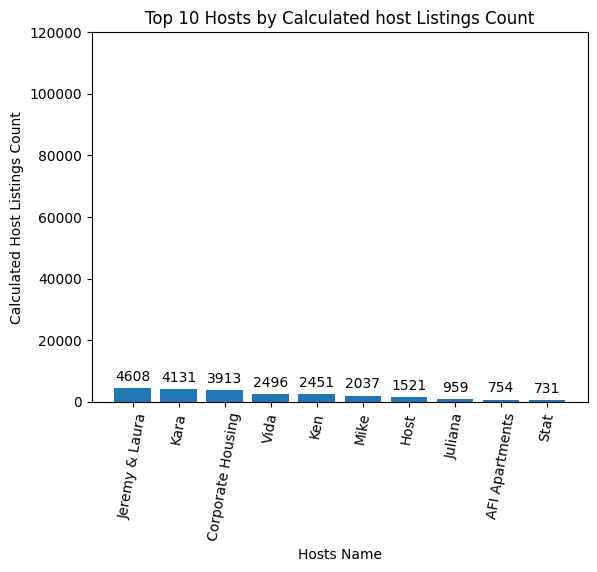

In [48]:
#who are the top 10 hosts by calculated host listing count?

hosts=df.groupby('host name') ['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()

hosts_bar=plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);

plt.bar_label(hosts_bar, label=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3);

plt.xlabel('Hosts Name');

plt.ylabel('Calculated Host Listings Count');

plt.xticks(rotation = 80);

plt.ylim([0, 120000]);

plt.title('Top 10 Hosts by Calculated host Listings Count');

In [49]:
#Are hosts with verified identities more likely to receive positive reviews?

review =df.groupby('host_identity_verified') ['review rate number'].mean().sort_values(ascending =False).to_frame()

review

,review rate number
host_identity_verified,
verified,3.001389
unconfirmed,2.987786


NameError: name 'review_bar' is not defined

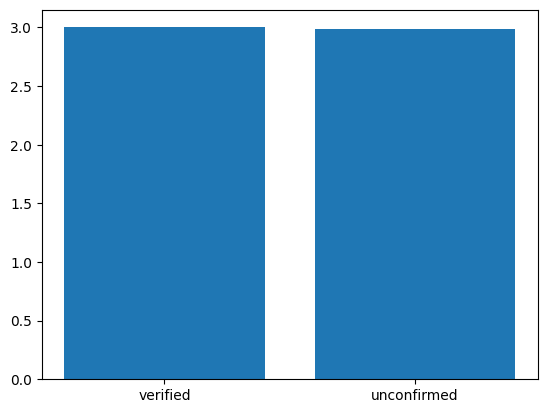

In [57]:
#review bar

plt.bar(review.index, review.loc[:, "review rate number"]);

plt.bar_label(review_bar ,labels=round(review.loc[:, "review rate number"], 2), padding= 4);

plt.ylim([0,4]);

plt.xlabel("Host Verification Status");

plt.ylabel("Average Review Rate Number");

plt.title("Average Review Rate for each Verification Statistics.");

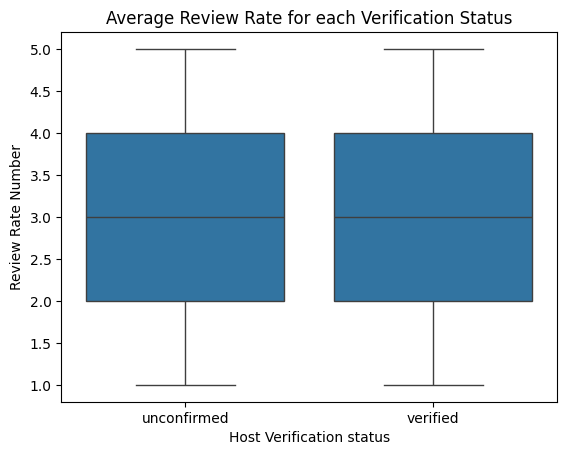

In [59]:
base_color=sns.color_palette()[0]

sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color=base_color);

plt.xlabel('Host Verification status');

plt.ylabel('Review Rate Number');

plt.title('Average Review Rate for each Verification Status');

In [69]:
#Is there a correlation between the price of a listing and its service fee?

df['price_$'].corr(df['service_fee_$'])

np.float64(0.99999108223292)

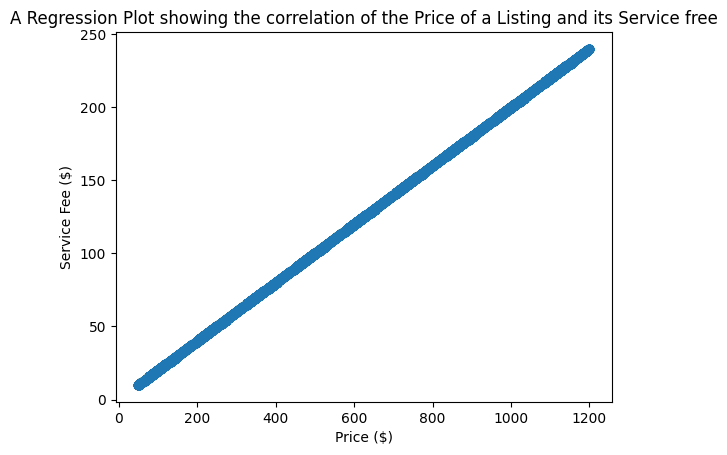

In [68]:
sns.regplot(df, x ='price_$', y='service_fee_$');

plt.xlabel('Price ($)');

plt.ylabel('Service Fee ($)');

plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service free');

In [71]:
ARRN=df.groupby(['neighbourhood group', 'room type']) ['review rate number'].mean().to_frame()

ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.037975
                    Private room               2.952000
                    Shared room                2.600000
Brooklyn            Entire home/apt            2.967023
                    Private room               3.013963
                    Shared room                3.047619
Manhattan           Entire home/apt            3.016655
                    Private room               3.002971
                    Shared room                2.961905
Queens              Entire home/apt            2.918715
                    Private room               2.947137
                    Shared room                3.000000
Staten Island       Entire home/apt            3.055556
                    Private room               3.076923

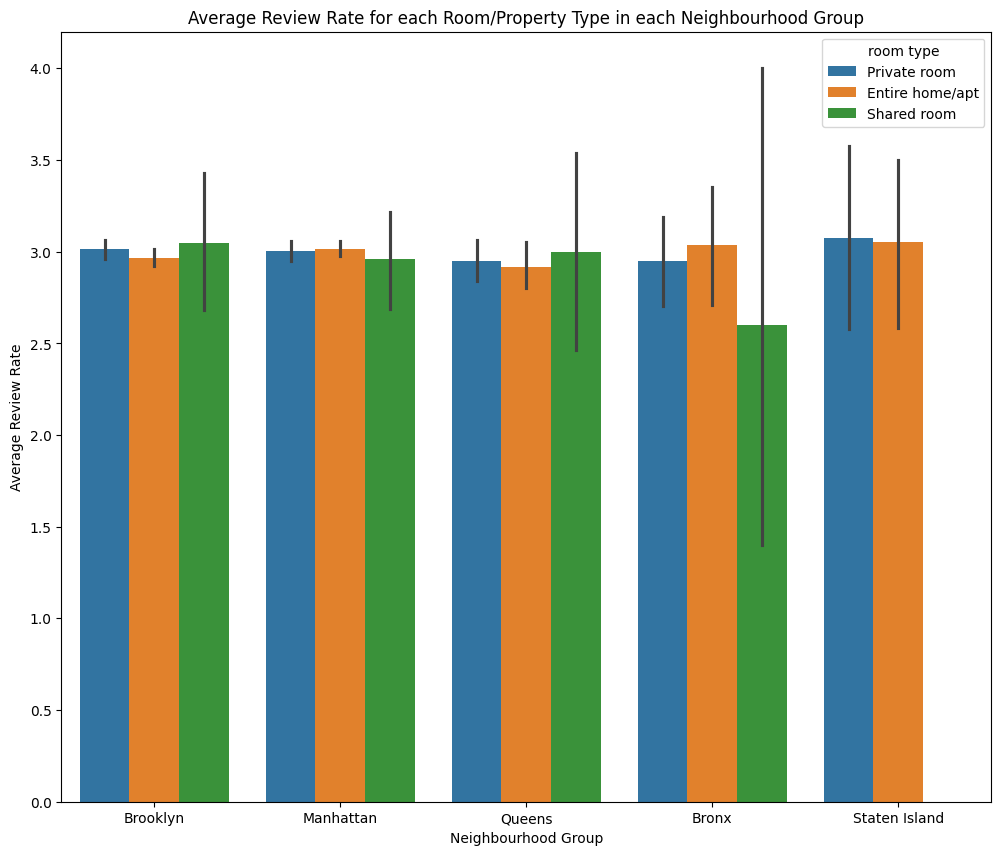

In [73]:
plt.figure(figsize =[12,10]);

sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue='room type')

plt.xlabel('Neighbourhood Group');

plt.ylabel('Average Review Rate');

plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group');

Text(0.5, 1.0, 'A Regression Plot of the Relationship between calculated Host Listings Count and availability 365')

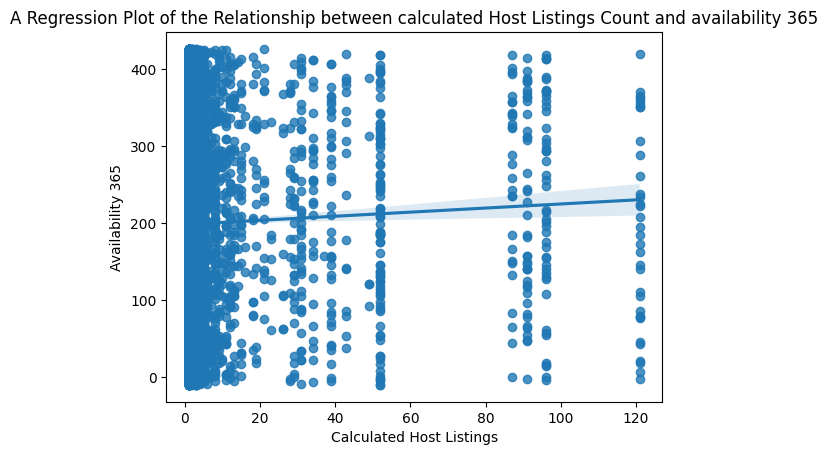

In [76]:
sns.regplot(df,x='calculated host listings count', y='availability 365');

plt.xlabel('Calculated Host Listings');

plt.ylabel('Availability 365');

plt.title('A Regression Plot of the Relationship between calculated Host Listings Count and availability 365')

In [75]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.02340535360406242)